In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community


data = pd.read_csv(r"C:\Users\alpie\OneDrive\Desktop\Coding\SocialGraphs\employee_reviews.csv", low_memory=False)

In [ ]:
companies = data['company'].unique()
print("Unique values in 'type' column:", companies)

Unique values in 'type' column: ['google' 'amazon' 'facebook' 'netflix' 'apple' 'microsoft']


In [4]:
job_title = data['job-title'].unique()
print("Unique values in 'type' column:", job_title)

Unique values in 'type' column: ['Current Employee - Anonymous Employee'
 'Former Employee - Program Manager'
 'Current Employee - Software Engineer III' ...
 'Current Employee - Programmer Manager'
 'Former Employee - Senior Project Managet'
 'Current Employee - Technical Sales Manager']


In [9]:
relevant_columns = ['company', 'dates', 'job-title', 'summary', 'pros', 'cons', 'advice-to-mgmt', 'overall-ratings']
filtered_data = data[relevant_columns]

In [ ]:
# Ensure datetime format
filtered_data['dates'] = pd.to_datetime(filtered_data['dates'], errors='coerce')

In [ ]:
filtered_data = filtered_data.dropna(subset=['dates', 'overall-ratings'])

In [ ]:
#Categorize data into pre-2016 and 2016-onwards
filtered_data['date_category'] = filtered_data['dates'].apply(lambda x: 'Pre-2016' if x.year < 2016 else '2016+')

In [18]:
# Group by company and date category, calculating the average rating
grouped_data = filtered_data.groupby(['company', 'date_category'])['overall-ratings'].mean().reset_index()

In [19]:
print("Average Overall Ratings Per Company Per Date Category:")
print(grouped_data)

Average Overall Ratings Per Company Per Date Category:
      company date_category  overall-ratings
0      amazon         2016+         3.675033
1      amazon      Pre-2016         3.333333
2       apple         2016+         3.987489
3       apple      Pre-2016         3.925103
4    facebook         2016+         4.461538
5    facebook      Pre-2016         4.575071
6      google         2016+         4.409351
7      google      Pre-2016         4.258616
8   microsoft         2016+         4.013188
9   microsoft      Pre-2016         3.679811
10    netflix         2016+         3.574830
11    netflix      Pre-2016         3.316505


In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
grouped_data_expanded = pd.DataFrame({
    'company': ['google', 'google', 'amazon', 'amazon', 'facebook', 'facebook', 'apple', 'apple', 'microsoft', 'microsoft'],
    'date_category': ['Pre-2016', '2016+'] * 5,
    'overall-ratings': np.random.uniform(3.5, 4.5, 10)  # Random ratings for demonstration
})


In [50]:
filtered_grouped_data_expanded = grouped_data_expanded[grouped_data_expanded['company'].isin(selected_companies)]
pivot_data_filtered_expanded = filtered_grouped_data_expanded.pivot(index='company', columns='date_category', values='overall-ratings')

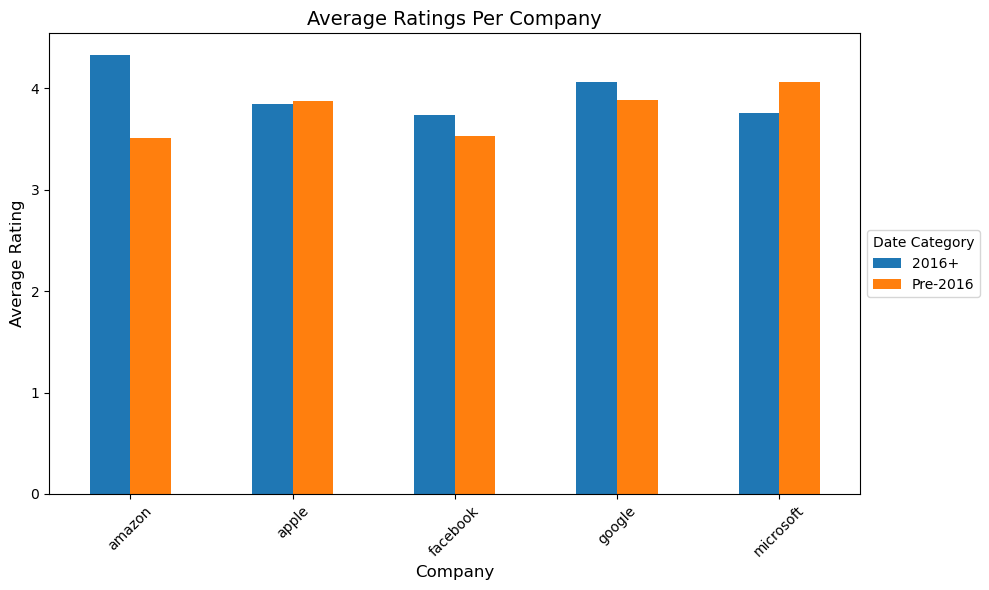

In [48]:
pivot_data_filtered_expanded.plot(kind='bar', figsize=(10, 6))

plt.title("Average Ratings Per Company", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Date Category",loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

In [23]:
# Ensure that all relevant columns are strings and replace NaN values with an empty string
columns_to_merge = ['summary', 'pros', 'cons', 'advice-to-mgmt']
filtered_data[columns_to_merge] = filtered_data[columns_to_merge].fillna("").astype(str)

In [26]:
filtered_data['feedback'] = filtered_data[columns_to_merge].apply(
    lambda row: '. '.join(filter(None, row)), axis=1
)

In [25]:
print(filtered_data[['company', 'employee_status', 'feedback']].head(15))

   company employee_status                                           feedback
0   google         Current  Best Company to work for. People are smart and...
1   google          Former  Moving at the speed of light, burn out is inev...
2   google         Current  Great balance between big-company security and...
3   google         Current  The best place I've worked and also the most d...
4   google          Former  Unique, one of a kind dream job. Google is a w...
5   google          Former  NICE working in GOOGLE as an INTERN. People ar...
6   google         Current  Software engineer. Great working environment. ...
7   google          Former  great place to work and progress. work culture...
8   google         Current  Google Surpasses Realistic Expectations. Great...
9   google         Current  Execellent for engineers. Impact driven. Best ...
10  google         Current  Nice place to work. * Smart people * World cla...
11  google         Current  Software Engineer. * There is endles

In [56]:
count_data = filtered_data.groupby(['company', 'employee_status']).size().reset_index(name='count')

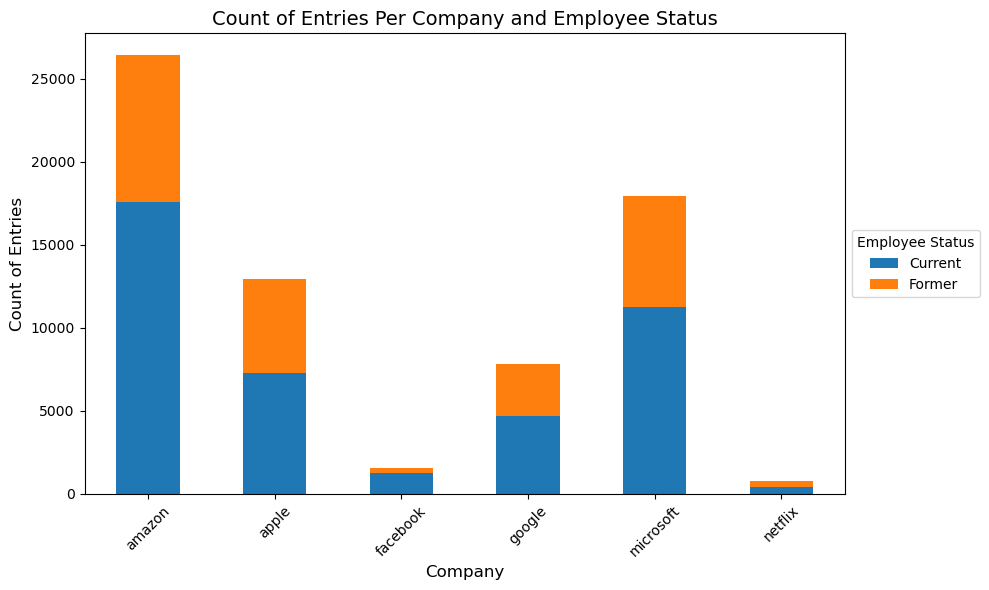

In [58]:
pivot_count_data = count_data.pivot(index='company', columns='employee_status', values='count')

# Create a bar plot for count values
pivot_count_data.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title("Count of Entries Per Company and Employee Status", fontsize=14)
plt.xlabel("Company", fontsize=12)
plt.ylabel("Count of Entries", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Employee Status", loc='center left', bbox_to_anchor=(1.0, 0.5))  # Legend to the right
plt.tight_layout()
plt.show()
